In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris

In [6]:
iris=load_iris()

In [13]:
X = iris.data 
target = iris.target 
names = iris.target_names

In [16]:
df = pd.DataFrame(data=X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
df['species'] = iris['target']

In [22]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


/Users/Pankaj/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Pankaj/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Pankaj/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


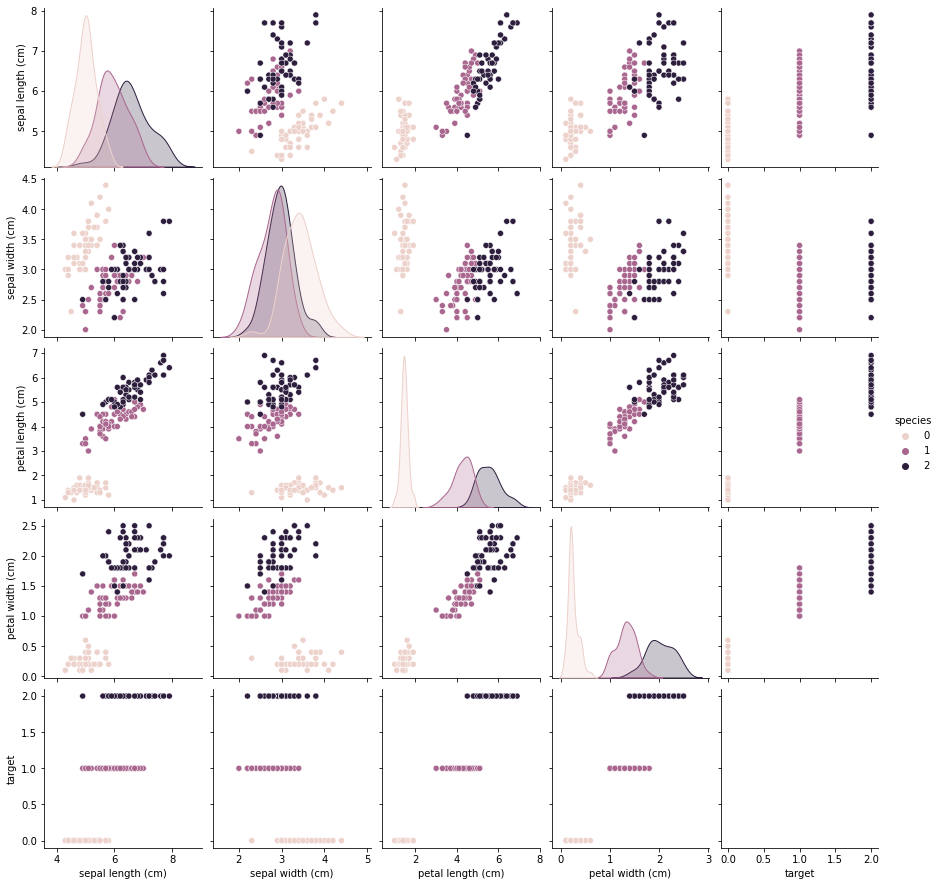

In [25]:
sns.pairplot(df,hue='species')

In [29]:
df1=df[df['species']!=0][['sepal length (cm)','sepal width (cm)','species']]

In [30]:
df1

,sepal length (cm),sepal width (cm),species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [31]:
df1.head()

,sepal length (cm),sepal width (cm),species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [32]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [34]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [35]:
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]

In [44]:
for estimator in estimators:
    x=cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.mean(x))

lr 0.8066666666666669
rf 0.7133333333333334
knn 0.7466666666666667


In [45]:
from sklearn.ensemble import VotingClassifier

In [49]:
vc=VotingClassifier(estimators=estimators,voting='hard')
score=cross_val_score(vc,X,y,cv=10,scoring='accuracy')
np.mean(score)

0.76

In [50]:
vc=VotingClassifier(estimators=estimators,voting='soft')
score=cross_val_score(vc,X,y,cv=10,scoring='accuracy')
np.mean(score)

0.7666666666666667

In [51]:
from sklearn.svm import SVC

In [55]:
svm1=SVC(probability=True,kernel='poly',degree=1)
svm2=SVC(probability=True,kernel='poly',degree=2)
svm3=SVC(probability=True,kernel='poly',degree=3)
svm4=SVC(probability=True,kernel='poly',degree=4)
svm5=SVC(probability=True,kernel='poly',degree=5)
svm6=SVC(probability=True,kernel='poly',degree=6)
svm7=SVC(probability=True,kernel='poly',degree=7)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5),('svm6',svm6),('svm7',svm7)]

In [ ]:
for e in estimators:
    x=cross_val_score(e[1],X,y,cv=10,scoring='accuracy')
    print(e[0],np.mean(x))

svm1 0.8200000000000001
svm2 0.8133333333333335
svm3 0.8066666666666669
svm4 0.8
svm5 0.7866666666666667
svm6 0.7866666666666666


In [ ]:
vc1=VotingClassifier(estimators=estimators,voting='soft')
x=cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
np.mean(x)